In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras import datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
#60000개의 28x28 형태의 데이터

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


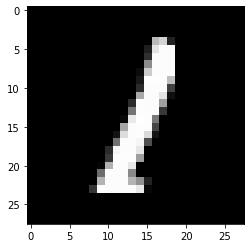

1
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 185 211
   34   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  30 228 252
  252   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  47 252 252
  252   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 140 252 252
  252   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  11 

In [32]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray')
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

In [33]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [34]:
print(Y_train[5000])
print(y_train[5000])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [69]:
x_train = X_train.reshape(-1, 28 * 28) # 784x1 로 reshape
x_test = X_test.reshape(-1, 28 * 28)
x_train = x_train / 255 # 최소값 0, 최대값 255 이기 때문에 255로 나누어서 0~1사이의 값으로 scaling = MinMaxScaling
x_test = x_test / 255
print(x_train.shape)

(60000, 784)


In [70]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
#model.add(Dropout(0.2)) 비교해보려고 사용함 데이터가 깔끔해서 오히려 점수가 낮아진다
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.15))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #다중분류기에서는 분류클래스 만큼 출력에 설정, 다중분류기 = softmax(확률 값으로)


In [71]:
#opt = Adam(lr=0.01)
model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics='accuracy')
#다중분류기에서는 loss 'categoricla_crossentropy', metrics 'accuracy' 사용 / 이중분류기일때만 'binary_accuracy'
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_53 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_54 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_55 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_56 (Dense)             (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________
None


In [72]:
fit_hist = model.fit(x_train, y_train,
                     batch_size=50, epochs=10, verbose=1)

Epoch 1/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.2093 - accuracy: 0.9367
Epoch 2/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0902 - accuracy: 0.9722
Epoch 3/10
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0627 - accuracy: 0.9807
Epoch 4/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0494 - accuracy: 0.9846
Epoch 5/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0417 - accuracy: 0.9869
Epoch 6/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0341 - accuracy: 0.9895
Epoch 7/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0290 - accuracy: 0.9904
Epoch 8/10
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0267 - accuracy: 0.9917
Epoch 9/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0226 - accuracy: 0.9930
Epoch 10/10
1200/1200 [==============================] - 9s 8ms/step - loss

In [73]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Final test accuracy :', score[1])

Final test accuracy : 0.9825999736785889


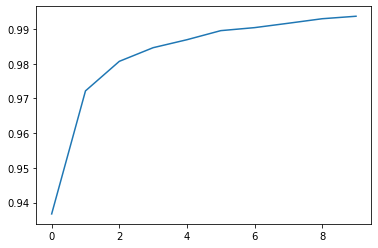

In [74]:
plt.plot(fit_hist.history['accuracy'])
plt.show()

4
[[4.1409137e-10 3.6064878e-07 8.9745882e-08 1.2611346e-08 9.9997354e-01
  5.9222225e-07 5.7179915e-07 2.7409516e-07 5.3467804e-08 2.4522958e-05]]
4


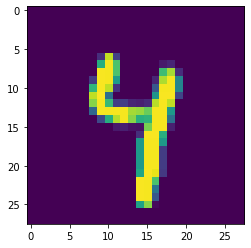

In [75]:
my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample])
print(Y_test[my_sample])
pred = model.predict(x_test[my_sample].reshape(-1, 784))
print(pred)
print(np.argmax(pred))